In [4]:

from itertools import product

import datacube
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.api as sm
import xarray as xr
from datacube import Datacube
from datacube.utils.geometry import Geometry
from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.bandindices import calculate_indices
from deafrica_tools.dask import create_local_dask_cluster
from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import display_map
from matplotlib import pyplot as plt
from statsmodels.tools.eval_measures import rmse
from tqdm.notebook import tqdm
from deafrica_tools.areaofinterest import define_area

In [5]:
dc = datacube.Datacube(app="04_Plotting")
#15.85828652, 80.78694696
#15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-10, 10))


In [6]:
display_map(lon_range, lat_range)

/home/adithya/anaconda3/envs/odc_env/lib/python3.8/site-packages/deafrica_tools/plotting.py:284: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  all_longitude, all_latitude = transform(Proj(crs), Proj("EPSG:4326"), all_x, all_y)


In [7]:
dataset =  (ds)

# Calculate the components that make up the NDVI calculation
band_diff = dataset.B08_10m - dataset.B04_10m
band_sum = dataset.B08_10m + dataset.B04_10m

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
print(ndvi)

<xarray.DataArray (time: 2, y: 1280, x: 2269)>
array([[[ 0.50063694,  0.50636132,  0.50286078, ...,  0.08988764,
          0.06698225,  0.05081401],
        [ 0.49336784,  0.48788815,  0.48693127, ...,  0.09023941,
          0.07578293,  0.05894106],
        [ 0.49336784,  0.48788815,  0.48693127, ...,  0.07393365,
          0.06647537,  0.04037652],
        ...,
        [15.79689018, 15.91478942, 15.98695545, ..., 13.48379052,
         13.40412371, 11.33053809],
        [15.78561011, 15.70502901, 15.81957633, ..., 12.91421763,
         14.71312217, 11.77559913],
        [16.04249012, 15.68888889, 15.7017883 , ..., 12.44325153,
         15.20660576, 13.01202405]],

       [[ 0.54360656,  0.55548324,  0.56028369, ...,  0.11086798,
          0.09161191,  0.0711129 ],
        [ 0.53658134,  0.54940711,  0.56257901, ...,  0.09035222,
          0.09885621,  0.09691071],
        [ 0.53658134,  0.54940711,  0.56257901, ...,  0.08272506,
          0.10923661,  0.09792285],
        ...,
       

<Figure size 800x800 with 0 Axes>

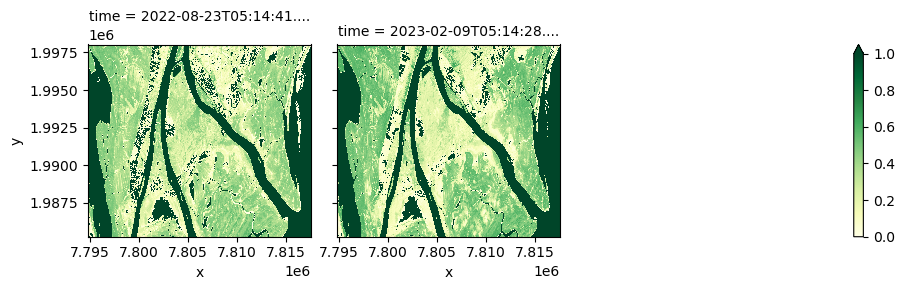

In [8]:
plt.figure(figsize=(8, 8))
ndvi.plot(col='time', cmap="YlGn", vmin=0, vmax=1, col_wrap=3)
plt.show()